# 使用wikiextractor（在git bash下使用）获得wiki_00和wiki_01文件

In [1]:
import re
import jieba
import pandas as pd

In [8]:
file1 = 'd:/extracted/AA/wiki_00'
file2 = 'd:/extracted/AA/wiki_01'

In [9]:
#将 wiki_00 和 wiki_01 合并到 Corpus
content1 = pd.read_csv(file1,encoding='utf-8',header =None,sep='\t')
content2 = pd.read_csv(file2,encoding='utf-8',header =None,sep='\t')
article1 = content1[0].tolist()
article2 = content2[0].tolist()
Corpus = article1 + article2

In [10]:
#使用正则表达式二次清洗语料 Corpus
def token(string):
    
    return re.findall(r'^[^\d]\w+',string)

Corpus_2_clean =  [''.join(token(str(a))) for a in Corpus]
Corpus_2_clean

['<doc',
 '数学',
 '数学是利用符号语言研究數量',
 '基礎數學的知識與運用總是個人與團體生活中不可或缺的一環',
 '今日',
 '西方语言中',
 '汉字表示的',
 '數學有着久遠的歷史',
 '史前的人類就已嘗試用自然的法則來衡量物質的多少',
 '更進一步則需要寫作或其他可記錄數字的系統',
 '在最初有歷史記錄的時候',
 '到了16世纪',
 '從古至今',
 '每當有涉及數量',
 '如同大多數的研究領域',
 '許多數學家談論數學的',
 '我們現今所使用的大部分數學符號在16世紀後才被發明出來的',
 '數學語言亦對初學者而言感到困難',
 '嚴謹是數學證明中很重要且基本的一部份',
 '公理在傳統的思想中是',
 '卡爾',
 '許多哲學家相信數學在經驗上不具可否證性',
 '另一觀點則為某些科學領域',
 '數學家對此的態度並不一致',
 '如上所述',
 '為了闡明數學基礎',
 '數學邏輯專注於將數學置在一堅固的公理架構上',
 '現代邏輯被分成遞歸論',
 '數量的研究起於數',
 '當數系更進一步發展時',
 '許多如數及函數的集合等數學物件都有著內含的結構',
 '创立于二十世纪三十年代的法国的布尔巴基学派认为',
 '结构',
 '布尔巴基学派认为',
 '空間的研究源自於幾何',
 '了解及描述變化在自然科學裡是一普遍的議題',
 '離散數學是指對理論電腦科學最有用處的數學領域之總稱',
 '作為一相對較新的領域',
 '應用數學思考將抽象的數學工具運用在解答科學',
 '數學獎通常和其他科學的獎項分開',
 '',
 '<doc',
 '哲学',
 '哲學',
 '英語詞語',
 '“哲',
 '英国哲学家罗素对哲学的定义是',
 '胡適在',
 '雖然哲學源自西方的傳統',
 '對哲學的主題亦存在許多看法',
 '古希臘哲學家經常提出問題',
 '现代哲学上出現',
 '哲學可以分为很多不同的分支',
 '很多人类社群思考过哲学问题并且互相学习建立了各种哲学流派',
 '东方哲学是通过每个地区的历史时期来组织的',
 '印度哲學的歷史源遠流長',
 '中國哲學的主要部分起源東周時期',
 '古希腊',
 '在公元前6世纪的希腊',
 '公元前5世纪中期',
 '公元前6世纪末',
 '其中关于变与不变的关系的

In [11]:
from langconv import * 

In [12]:
#清洗残留的‘<doc’、‘<br’
#繁体转换为简体
patten1 = re.compile('<doc')
patten2 = re.compile('<br')
Corpus_clean = []
Corpus_final = []

for a in Corpus_2_clean:
    a = patten1.sub('',a)
    a = patten2.sub('',a)
    Corpus_clean.append(a)

for a in Corpus_clean:
    if len(a) != 0:
        a = Converter('zh-hans').convert(a) #转换简体，下载 langconv.py 和 zh_wiki.py 两个文件到代码目录下。
        Corpus_final.append(a)
        
Corpus_final

['数学',
 '数学是利用符号语言研究数量',
 '基础数学的知识与运用总是个人与团体生活中不可或缺的一环',
 '今日',
 '西方语言中',
 '汉字表示的',
 '数学有着久远的历史',
 '史前的人类就已尝试用自然的法则来衡量物质的多少',
 '更进一步则需要写作或其他可记录数字的系统',
 '在最初有历史记录的时候',
 '到了16世纪',
 '从古至今',
 '每当有涉及数量',
 '如同大多数的研究领域',
 '许多数学家谈论数学的',
 '我们现今所使用的大部分数学符号在16世纪后才被发明出来的',
 '数学语言亦对初学者而言感到困难',
 '严谨是数学证明中很重要且基本的一部份',
 '公理在传统的思想中是',
 '卡尔',
 '许多哲学家相信数学在经验上不具可否证性',
 '另一观点则为某些科学领域',
 '数学家对此的态度并不一致',
 '如上所述',
 '为了阐明数学基础',
 '数学逻辑专注于将数学置在一坚固的公理架构上',
 '现代逻辑被分成递归论',
 '数量的研究起于数',
 '当数系更进一步发展时',
 '许多如数及函数的集合等数学物件都有着内含的结构',
 '创立于二十世纪三十年代的法国的布尔巴基学派认为',
 '结构',
 '布尔巴基学派认为',
 '空间的研究源自于几何',
 '了解及描述变化在自然科学里是一普遍的议题',
 '离散数学是指对理论电脑科学最有用处的数学领域之总称',
 '作为一相对较新的领域',
 '应用数学思考将抽象的数学工具运用在解答科学',
 '数学奖通常和其他科学的奖项分开',
 '哲学',
 '哲学',
 '英语词语',
 '“哲',
 '英国哲学家罗素对哲学的定义是',
 '胡适在',
 '虽然哲学源自西方的传统',
 '对哲学的主题亦存在许多看法',
 '古希腊哲学家经常提出问题',
 '现代哲学上出现',
 '哲学可以分为很多不同的分支',
 '很多人类社群思考过哲学问题并且互相学习建立了各种哲学流派',
 '东方哲学是通过每个地区的历史时期来组织的',
 '印度哲学的历史源远流长',
 '中国哲学的主要部分起源东周时期',
 '古希腊',
 '在公元前6世纪的希腊',
 '公元前5世纪中期',
 '公元前6世纪末',
 '其中关于变与不变的关系的争论',
 '在古典希腊时期西方哲学方法的关键

In [49]:
with open('Corpus.txt','w',encoding='utf-8') as f:
   for a in Corpus_final:
        
        f.write(a)

In [15]:
#使用jieba分词对语料进行切词
def cut(string): return list(jieba.cut(string))

TOKEN=[]

for i,line in enumerate((open('Corpus.txt',encoding='utf-8'))):
    if i % 100 == 0: print(i)   
    if i > 2000000: break #尝试取200万数据
    
    TOKEN += cut(line)

    

len(TOKEN)

0


21407384

In [18]:
TOKEN

['数学',
 '数学',
 '是',
 '利用',
 '符号语言',
 '研究',
 '数量',
 '基础',
 '数学',
 '的',
 '知识',
 '与',
 '运用',
 '总是',
 '个人',
 '与',
 '团体',
 '生活',
 '中',
 '不可或缺',
 '的',
 '一环',
 '今日',
 '西方',
 '语言',
 '中',
 '汉字',
 '表示',
 '的',
 '数学',
 '有着',
 '久远',
 '的',
 '历史',
 '史前',
 '的',
 '人类',
 '就',
 '已',
 '尝试',
 '用',
 '自然',
 '的',
 '法则',
 '来',
 '衡量',
 '物质',
 '的',
 '多少',
 '更进一步',
 '则',
 '需要',
 '写作',
 '或',
 '其他',
 '可',
 '记录',
 '数字',
 '的',
 '系统',
 '在',
 '最初',
 '有',
 '历史记录',
 '的',
 '时候',
 '到',
 '了',
 '16',
 '世纪',
 '从古至今',
 '每当',
 '有',
 '涉及',
 '数量',
 '如同',
 '大多数',
 '的',
 '研究',
 '领域',
 '许多',
 '数学家',
 '谈论',
 '数学',
 '的',
 '我们',
 '现今',
 '所',
 '使用',
 '的',
 '大部分',
 '数学',
 '符号',
 '在',
 '16',
 '世纪',
 '后',
 '才',
 '被',
 '发明',
 '出来',
 '的',
 '数学',
 '语言',
 '亦',
 '对',
 '初学者',
 '而言',
 '感到',
 '困难',
 '严谨',
 '是',
 '数学',
 '证明',
 '中',
 '很',
 '重要',
 '且',
 '基本',
 '的',
 '一部',
 '份',
 '公理',
 '在',
 '传统',
 '的',
 '思想',
 '中是',
 '卡尔',
 '许多',
 '哲学家',
 '相信',
 '数学',
 '在',
 '经验',
 '上',
 '不具',
 '可否',
 '证性',
 '另',
 '一',
 '观点',
 '则',
 '为',
 '某些',
 '科学',
 '领域',
 '数学家',

In [19]:
#将分词存储到文件 cut_Corpus.txt
with open('cut_Corpus.txt','w',encoding='utf-8') as f:
    for t in TOKEN:
        output = ''.join(t)
        f.write(output)
        f.write('\n')

# 使用Gensim对已经切词的文本进行model训练

In [1]:
import gensim
from gensim.test.utils import datapath
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

In [4]:
#使用 LineSentence 读取文本，再训练成词向量 model
sentences = LineSentence(datapath('cut_Corpus.txt'))
# 
model = Word2Vec(sentences,min_count=5,window=10,size=600,workers=4,iter=30)# 详细参数作用参考gensim文档。默认为CBOW方式。

In [6]:
# 保存model，以便以后调用
model.save('d:/word2vec_model')

In [7]:
#测试同义词或相近的词
model.similarity('好','不错')

c:\users\13569\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.017698148

In [8]:
model.most_similar('广州市')

c:\users\13569\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('洛城', 0.16730740666389465),
 ('3999', 0.16557858884334564),
 ('马希', 0.16536526381969452),
 ('名下', 0.16323626041412354),
 ('直江', 0.1624334752559662),
 ('越行', 0.16141940653324127),
 ('发展趋势', 0.15948982536792755),
 ('索尔纳', 0.15909408032894135),
 ('直下', 0.15890134871006012),
 ('劝济堂', 0.15883222222328186)]

In [9]:
# 获取词向量
model.wv['广州']

array([-5.31526632e-04,  6.67564454e-04, -3.06257833e-04,  1.00613550e-04,
       -6.18246384e-04,  8.28776101e-04, -7.35630631e-04,  3.25540401e-04,
       -8.01981252e-04,  2.88363604e-04, -6.43974985e-04, -5.84110385e-04,
       -6.79507735e-04, -4.96662571e-04, -3.55177355e-04, -5.40088622e-05,
        7.77608482e-04,  2.02724361e-04,  5.07875113e-04, -2.25767464e-04,
       -7.10964378e-04,  6.74484996e-04,  6.09603885e-04, -5.11799240e-04,
       -7.29602034e-05, -2.80551030e-04, -3.27680063e-05, -1.92348860e-04,
       -9.10781309e-05,  1.79614115e-04,  3.10548319e-04,  1.92372579e-04,
        1.22166530e-04,  9.56106742e-05,  3.35849065e-04, -6.59817248e-04,
       -5.21379872e-04,  4.49418556e-04, -3.62398045e-04,  7.65151344e-04,
        4.62240772e-04,  6.35879929e-04, -7.93550687e-04, -6.82065613e-04,
        3.11140611e-04,  5.30553052e-06, -6.03522465e-04, -4.88322548e-05,
        3.09100033e-05,  3.42310377e-04,  2.07448509e-04,  6.60477090e-04,
       -5.53920574e-04, -

# 使用T-SEN进行词向量的可视化

In [14]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family'] = 'sans-serif'

In [11]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

c:\users\13569\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
c:\users\13569\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\13569\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\13569\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\13569\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 228 missing from current fo

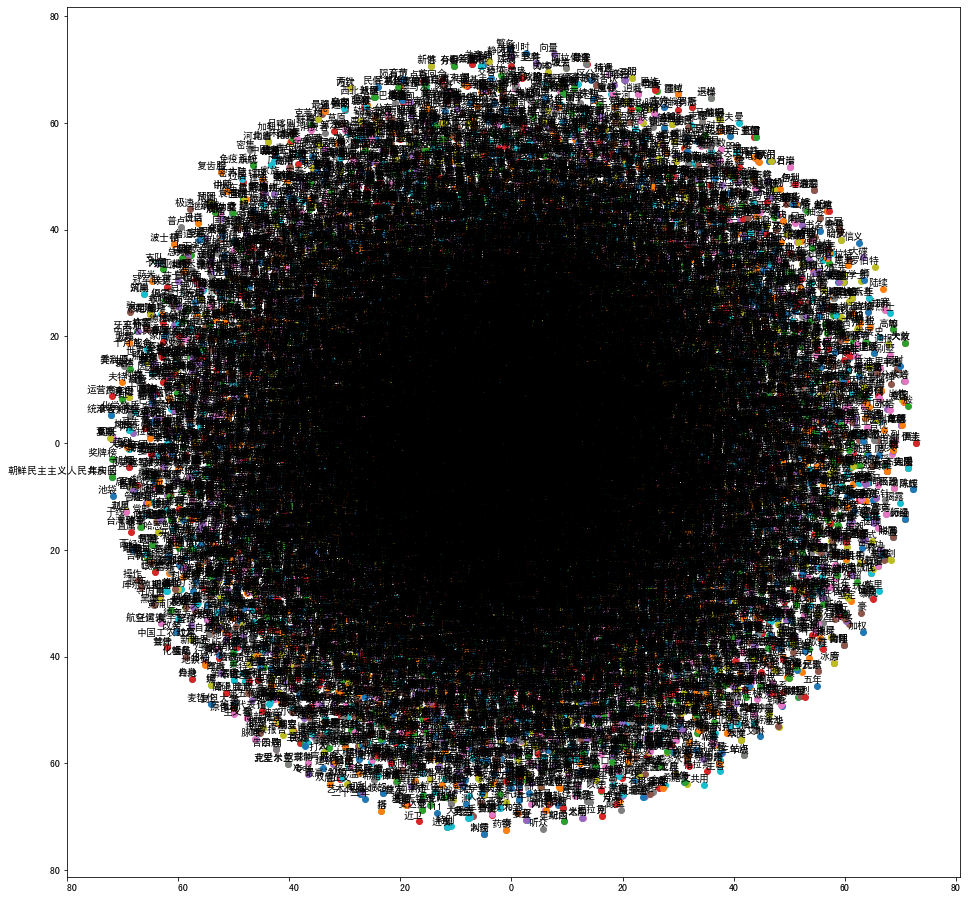

In [15]:
model = Word2Vec(sentences,min_count=100,window=20,size=200,workers=4)

tsne_plot(model)

c:\users\13569\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
c:\users\13569\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\13569\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


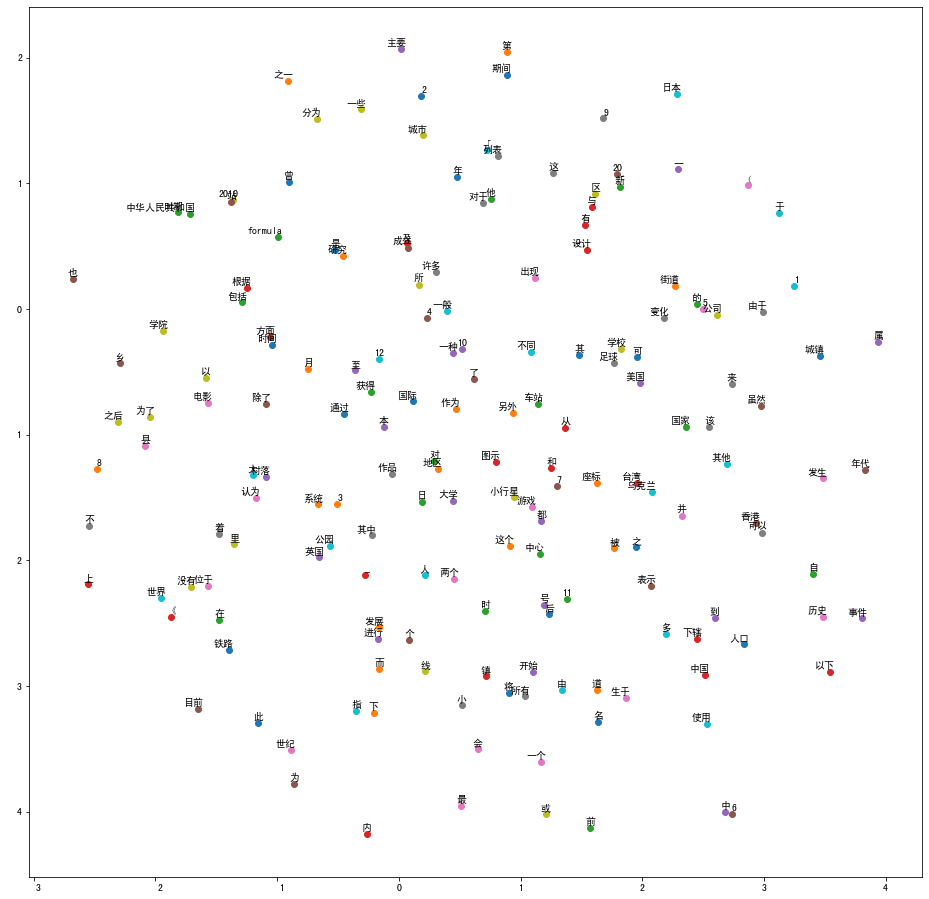

In [16]:
model = Word2Vec(sentences,min_count=10000,window=20,size=100,workers=4)

tsne_plot(model)